# 01-Logical-Analysis-Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.one_hot import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import classification_report

import sys
sys.path.append(r"D://github//Kaggle//src")
import config
import custom_funcs

import gender_guesser.detector as gender
d = gender.Detector()



#### Importing the data

In [2]:
# Importing the train data
train = pd.read_csv(config.train_data_path,sep=',')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Importing the test data
test = pd.read_csv(config.test_data_path,sep=',')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Cleaning the Data

In [4]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
def data_cleaning(df):
    
    columns = ['CryoSleep','VIP','Transported']
    for i in columns:
        df[i] = custom_funcs.bool_to_num(df,i)
    
    custom_funcs.string_split(df,'Cabin')

    df[['FirstName','LastName']] = df['Name'].str.split(pat=' ',expand=True)

    df = df.drop(['Cabin','Name'],axis=1)

    return df

In [8]:
train = data_cleaning(train)

In [17]:
train['Gender'] = [d.get_gender(i) for i in train['FirstName']]

In [19]:
train['Gender'].value_counts(normalize=True)

unknown          0.837916
female           0.093293
male             0.048660
mostly_male      0.009318
andy             0.008167
mostly_female    0.002646
Name: Gender, dtype: float64

In [31]:
train.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8514.000000,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.374324,28.827930,0.046244,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.483976,14.489021,0.210025,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


<Axes: xlabel='Side', ylabel='Age'>

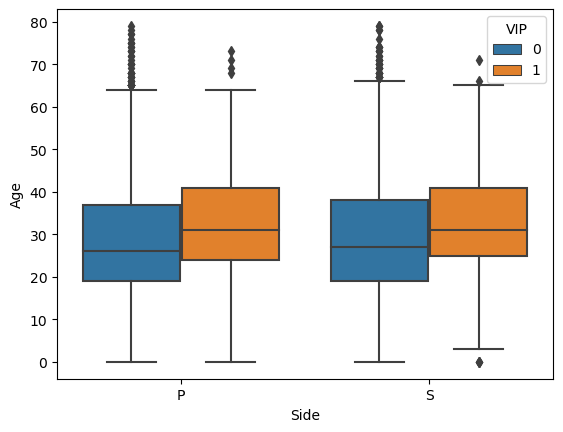

In [25]:
sns.boxplot(data=train,x='Side',y='Age',hue='VIP')

In [5]:
# train.fillna(0,inplace = True)

<Axes: xlabel='HomePlanet', ylabel='RoomService'>

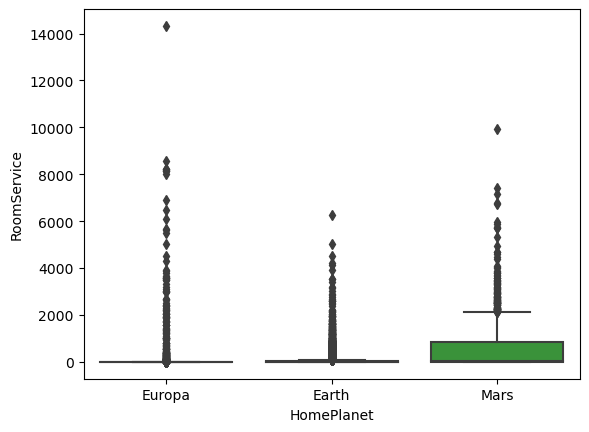

In [19]:
sns.boxplot(data=train,x='HomePlanet',y='RoomService')

<Axes: xlabel='HomePlanet', ylabel='ShoppingMall'>

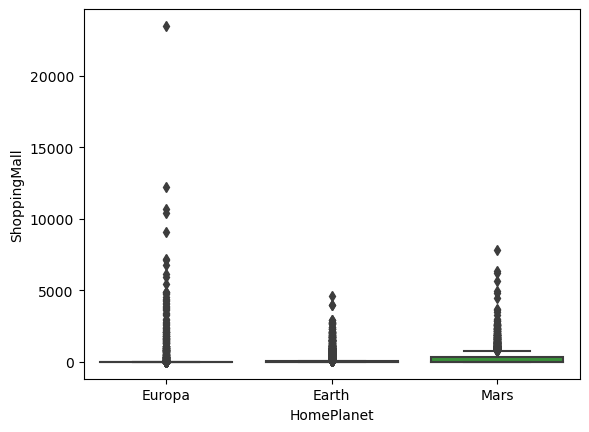

In [20]:
sns.boxplot(data=train,x='HomePlanet',y='ShoppingMall')

In [15]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


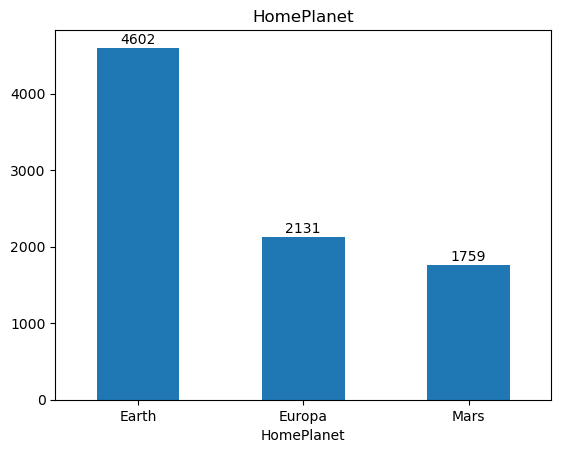

In [13]:
plt.title('HomePlanet')
ax = train.groupby(['HomePlanet'])['PassengerId'].count().plot(kind='bar')
plt.xticks(rotation=360)
for i in ax.containers:
    ax.bar_label(i, padding=1,label_type='edge')

In the 'Cabin' axis there are 3 'hidden' variables. Let's split them to perform the transformation to numeric features later.

In [9]:
custom_funcs.string_split(train,'Cabin')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [10]:
columns = ['CryoSleep','VIP','Transported']
for i in columns:
    train[i] = custom_funcs.bool_to_num(train,i)

In [11]:
train.iloc[:,-4:-3]

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [27]:
# Tentar tratar o nome, usando apenas o sobrenome. Para isso, tentar fazer um right.


train[['FirstName','LastName']] = train['Name'].str.split(pat=' ',expand=True)

In [28]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre


In [9]:
train.fillna(0,inplace=True)

In [10]:
train['Num'] = train['Num'].astype(int)

Making a One Hot Encoder with categorical features

In [11]:
one_hot_encoder = OneHotEncoder(cols=['HomePlanet','CryoSleep','Destination','VIP','Deck','Side'])

In [12]:
train = one_hot_encoder.fit_transform(train)

Excluding the categorical data

In [13]:
train.drop(['PassengerId','Name','Cabin'],inplace = True,axis=1)

#### Spliting the data

Initially, we will split the data into training and testing. For the data below, I'll split it as 80/20.

In [14]:
y = train['Transported']
X = train.drop(['Transported'],axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

First, we'll use Random Forest to see how it will perform.

In [15]:
clf = RandomForestClassifier(max_depth=2,random_state=0)

In [16]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

Random Forest performed well, let's test ADABoost now to see how it performs.

In [17]:
predict_RF = clf.predict(X_val)

accuracy_score(y_val, predict_RF)

0.7423806785508913

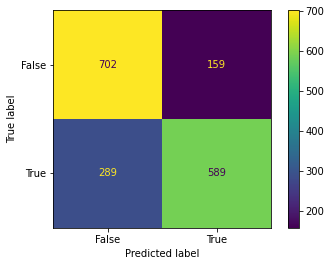

In [18]:
cm_randomforest = confusion_matrix(y_val, predict_RF)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_randomforest,
                                display_labels=clf.classes_)
disp_rf.plot()
plt.show()

In [19]:
print(classification_report(y_val, predict_RF))

              precision    recall  f1-score   support

       False       0.71      0.82      0.76       861
        True       0.79      0.67      0.72       878

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



#### ADABoosting Classifier

In [20]:
regr = AdaBoostClassifier(random_state=42, n_estimators=100)

In [21]:
regr.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [22]:
predict_ADA = regr.predict(X_val)

In [23]:
accuracy_score(y_val, predict_ADA)

0.7832087406555491

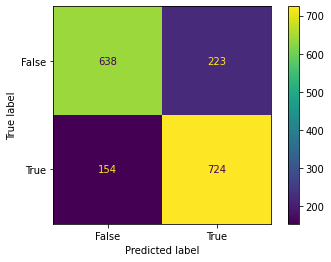

In [24]:
cm_ada = confusion_matrix(y_val, predict_ADA)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada,
                                display_labels=regr.classes_)
disp_ada.plot()
plt.show()

In [25]:
print(classification_report(y_val, predict_ADA))

              precision    recall  f1-score   support

       False       0.81      0.74      0.77       861
        True       0.76      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



Finally, let's test Gradient Boosting to see if it will be more accurate.

#### Gradient Boosting Classifier

In [26]:
GBC = GradientBoostingClassifier(n_estimators = 100,random_state=42,max_depth=2,learning_rate=1.0,max_features=2)


In [27]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, max_features=2,
                           random_state=42)

In [28]:
predict_gbc = GBC.predict(X_val)

In [29]:
accuracy_score(y_val, predict_gbc)

0.7901092581943646

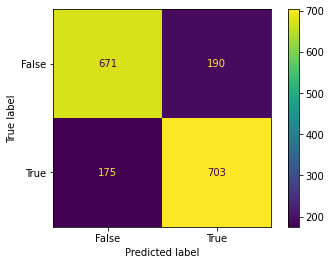

In [30]:
cm_gbc = confusion_matrix(y_val, predict_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc,
                                display_labels=GBC.classes_)
disp_gbc.plot()
plt.show()

In [31]:
print(classification_report(y_val, predict_gbc))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79       861
        True       0.79      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



#### Conclusion


Finally, for the data in question we had a better performance using Gradient Boosting. However, we also obtained satisfactory results with Random Forest and ADABoosting.

In [32]:
print('Random Forest:',accuracy_score(y_val, predict_RF))
print('ADABoost:',accuracy_score(y_val, predict_ADA))
print('Gradient Boosting Classifier:',accuracy_score(y_val, predict_gbc))

Random Forest: 0.7423806785508913
ADABoost: 0.7832087406555491
Gradient Boosting Classifier: 0.7901092581943646
